# Coin Flips: Random Generation from Bernoulli Distribution

When spun on edge 250 times, a Belgian one-euro coin came up heads 140 times and tails 110. ``It looks very suspicious to me," said Barry Blight, a statistics lecturer at the London School of Economics.

- Let's simulate the coin flip experiments.
- Let's try to find an estimate of the probability of head.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set_style("darkgrid"); 

plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
plt.style.use("dark_background")

import scipy.stats as stats

## Simulation

In [2]:
p = 0.5

In [3]:
u = np.random.uniform(low=0.0, high=1.0, size=1)  # generate from uniform distribution U[0,1]
X = 1 if u <= p else 0

print(X, u)

1 [0.4516809]


[0 1] [0.5 0.5]


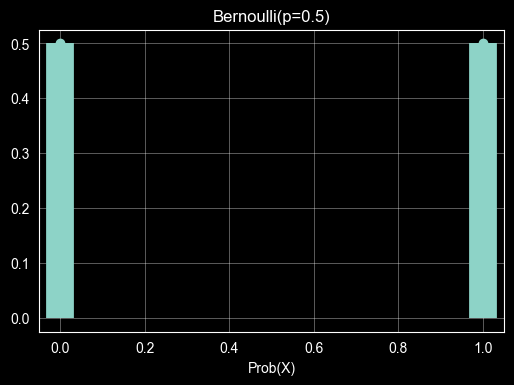

In [4]:
x = np.array([0, 1])
P = stats.bernoulli(p=p).pmf(x)
print(x, P)
markers, stems, base = plt.stem(x, P); 
stems.set_linewidth(20); base.set_linewidth(0)
plt.title(f'Bernoulli(p={p})'); plt.xlabel('Prob(X)');

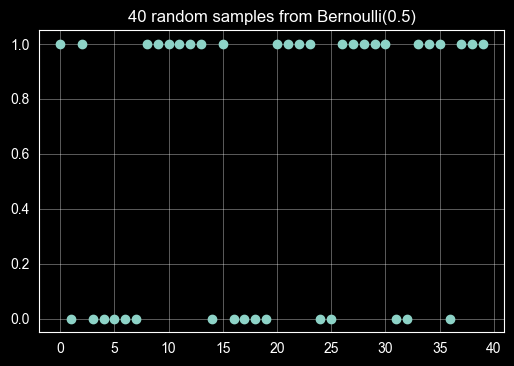

In [5]:
X = stats.bernoulli(p=p).rvs(40)
plt.plot(X, 'o'); plt.title('40 random samples from Bernoulli(0.5)');

## Mean & Std
1. Theoretically, 

\begin{align}
            \mu &= \mathbb{E}[X] = \sum_{X\in\{0,1\}} X P(X) = p, \\
            \sigma &= \mathbb{E}[(X-\mu)^2] = pq
\end{align}

1. Generate many samples and compute the average. It is called `sample mean`. 
2. Std = sample standard deviation

In [6]:
n_samples = 10000
X = stats.bernoulli(p=0.5).rvs(n_samples)
mean = X.sum()/n_samples
std = np.sqrt( ((X - mean)*(X-mean)).sum() / n_samples )
print(f'mean={mean}  std={std}; or  {X.mean()} & {X.std()}')

mean=0.4936  std=0.4999590383221409; or  0.4936 & 0.4999590383221409


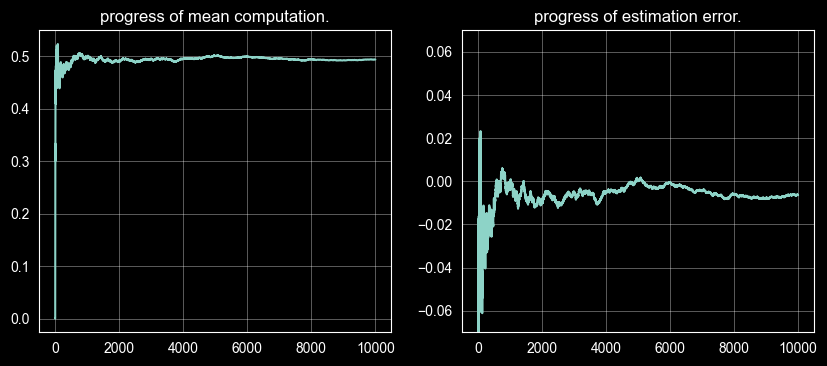

In [7]:
csum = X.cumsum();
p_est = np.array([ cs / (k+1) for k, cs in enumerate(csum)])
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].plot(range(n_samples), p_est); axes[0].set_title(f'progress of mean computation.')
axes[1].plot(range(n_samples), p_est - p); axes[1].set_title('progress of estimation error.')
axes[1].set_ylim(-0.07, 0.07); 

## Simulate 250 Bernoulli samples

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html

In [8]:
p = 0.5
ntotal = 250
nheads = 140

In [9]:
X = stats.bernoulli(p=p).rvs(ntotal); print(f'{X.shape}, Heads: {X.sum()}')

(250,), Heads: 119


In [10]:
repeat = 100000
# slow, do not try
# heads_simul = [stats.bernoulli(p=p).rvs(ntotal).sum() for i in range(repeat)] 

The proportion that # of heads is over 140 is 3.349%


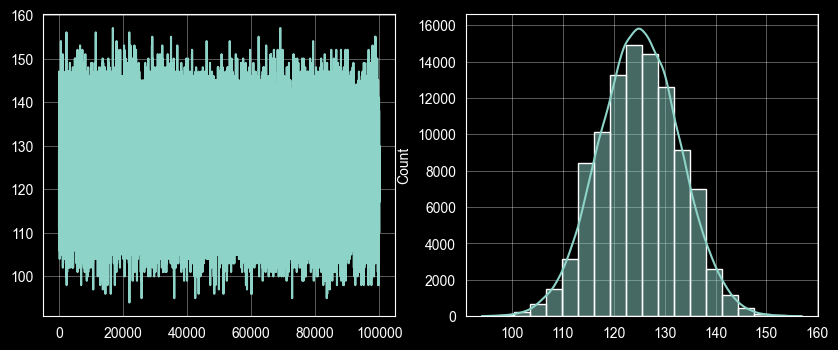

In [11]:
X = stats.bernoulli(p=p).rvs((repeat, ntotal))
heads_simul = X.sum(axis=1)
over_140 = heads_simul >= nheads
print(f'The proportion that # of heads is over 140 is {over_140.sum() * 100 / repeat}%')
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].plot(heads_simul); 
sns.histplot(heads_simul, kde=True, bins=20);

## Simulate 250 Bernoulli samples, p=.55

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html

In [12]:
p = 0.55

In [13]:
repeat = 100000

The proportion that # of heads is over 140 is 40.347%


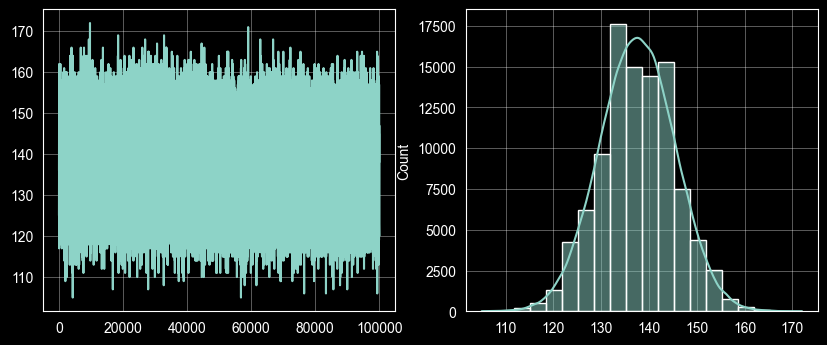

In [14]:
X = stats.bernoulli(p=p).rvs((repeat, ntotal))
heads_simul = X.sum(axis=1)
over_140 = heads_simul >= nheads
print(f'The proportion that # of heads is over 140 is {over_140.sum() * 100 / repeat}%')
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].plot(heads_simul); sns.histplot(heads_simul, kde=True, bins=20);

## Estimation of p with uniform prior

In [15]:
probs = np.linspace(.49, .60, 12)
prior = np.ones_like(probs) / len(probs)
print(f'candidate p: {probs}\nprior probability: {prior}')

candidate p: [0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6 ]
prior probability: [0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333]


In [16]:
# for each hypothesis p, we comput
likelihood = np.array([p**140 * (1-p)**110 for p in probs])
likelihood

array([2.88516447e-76, 5.52714788e-76, 9.58061651e-76, 1.50315657e-75,
       2.13494218e-75, 2.74465562e-75, 3.19266274e-75, 3.35828999e-75,
       3.19161067e-75, 2.73741752e-75, 2.11595228e-75, 1.47154687e-75])

In [17]:
posterior_unnormalized = prior * likelihood
posterior = posterior_unnormalized / posterior_unnormalized.sum()
posterior

array([0.01189782, 0.02279281, 0.03950847, 0.06198705, 0.08804057,
       0.11318388, 0.13165876, 0.13848888, 0.13161538, 0.1128854 ,
       0.08725746, 0.06068353])

In [18]:
istar = np.argmax(posterior)
pstar = probs[istar]
print(f'* best estimate is {pstar}')

* best estimate is 0.5599999999999999


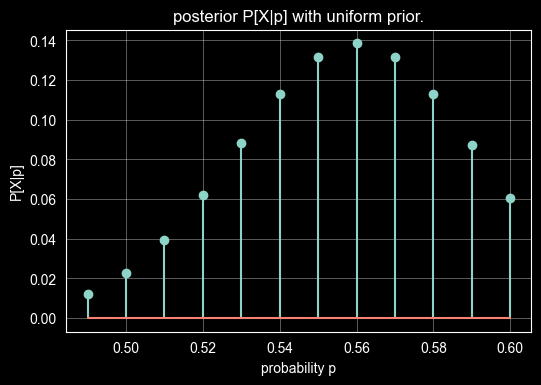

In [19]:
plt.stem(probs, posterior);
plt.xlabel('probability p')
plt.ylabel('P[X|p]')
plt.title('posterior P[X|p] with uniform prior.');

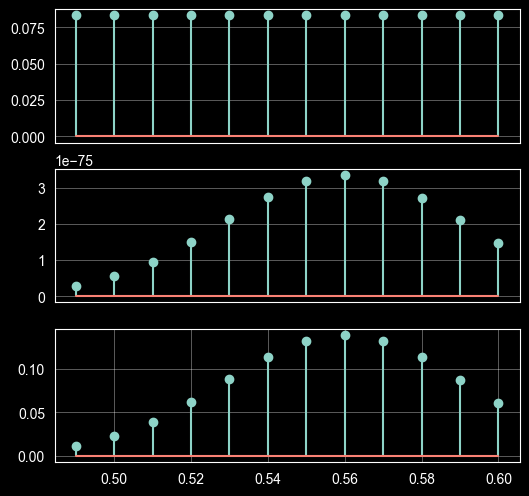

In [20]:
fig, axes = plt.subplots(3,1, figsize=(6,6))
for ax, pdf in zip(axes, [prior, likelihood, posterior]):
    ax.stem(probs, pdf)
axes[0].set_xticks([]); axes[1].set_xticks([]); 

## Estimation of p with triangular prior

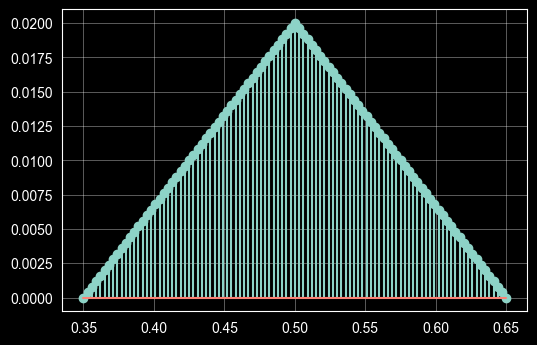

In [21]:
probs = np.linspace(.35, .65, 101)
m = len(probs)//2
pm = probs[m]
prior = np.empty_like(probs)
prior[:m] = np.array([(1 - 0)/(probs[m] - probs[0])*(p - probs[0]) for p in probs[:m]])
prior[m:] = np.array([(0 - 1)/(probs[-1] - probs[m])*(p - probs[m]) + 1 for p in probs[m:]])
prior = prior / prior.sum()
plt.stem(probs, prior);

<StemContainer object of 3 artists>

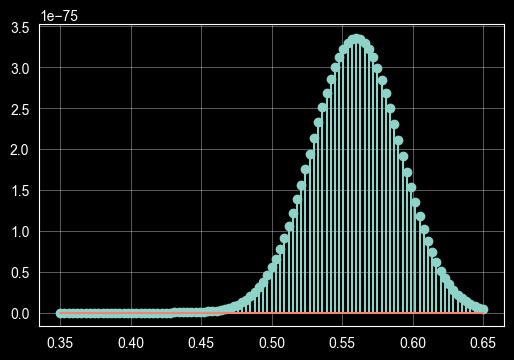

In [22]:
# for each hypothesis p, we comput
likelihood = np.array([p**140 * (1-p)**110 for p in probs])
plt.stem(probs, likelihood)

In [23]:
posterior_unnormalized = prior * likelihood
posterior = posterior_unnormalized / posterior_unnormalized.sum()
posterior

array([0.00000000e+00, 2.93895754e-13, 1.15275975e-12, 3.34958487e-12,
       8.54669506e-12, 2.01996802e-11, 4.52885232e-11, 9.75618594e-11,
       2.03495417e-10, 4.13028818e-10, 8.18564781e-10, 1.58800830e-09,
       3.02126215e-09, 5.64526519e-09, 1.03713388e-08, 1.87516523e-08,
       3.33908746e-08, 5.85969801e-08, 1.01394845e-07, 1.73081578e-07,
       2.91578099e-07, 4.84932563e-07, 7.96463421e-07, 1.29219869e-06,
       2.07147781e-06, 3.28183555e-06, 5.13958273e-06, 7.95782847e-06,
       1.21840389e-05, 1.84495718e-05, 2.76339277e-05, 4.09466634e-05,
       6.00299528e-05, 8.70845752e-05, 1.25021558e-04, 1.77640714e-04,
       2.49835774e-04, 3.47823670e-04, 4.79392709e-04, 6.54160871e-04,
       8.83831431e-04, 1.18242858e-03, 1.56649107e-03, 2.05519758e-03,
       2.67039364e-03, 3.43648772e-03, 4.38018348e-03, 5.53001738e-03,
       6.91567575e-03, 8.56707448e-03, 1.05131963e-02, 1.22794929e-02,
       1.42082850e-02, 1.62860289e-02, 1.84925360e-02, 2.08007747e-02,
      

In [24]:
istar = np.argmax(posterior)
pstar = probs[istar]
print(f'* best estimate is {pstar}')

* best estimate is 0.551


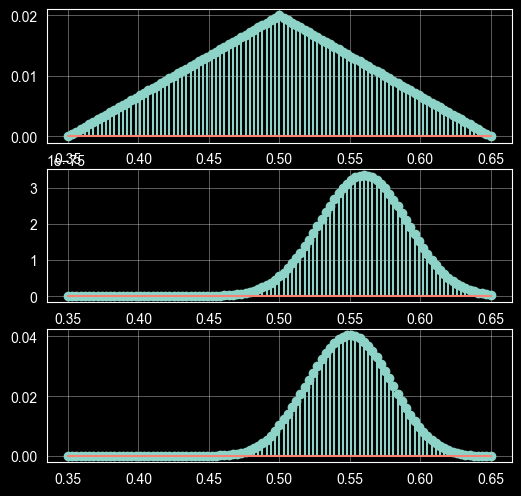

In [25]:
fig, axes = plt.subplots(3,1, figsize=(6,6))
for ax, pdf in zip(axes, [prior, likelihood, posterior]):
    ax.stem(probs, pdf)

## Estimation of p with Grids from Beta($\alpha$, $\beta$)

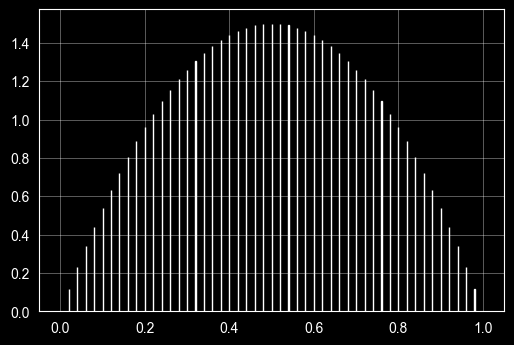

In [26]:
probs = np.linspace(.0, 1., 51)

import scipy.stats as stats
alpha, beta = 2, 2
prior = stats.beta(alpha, beta).pdf(probs)

width = 0.0001
plt.bar(probs, prior, width=width);

<BarContainer object of 51 artists>

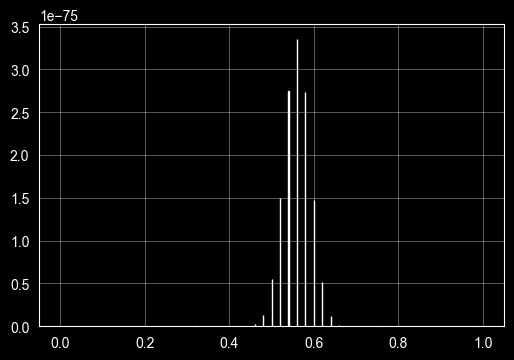

In [27]:
# for each hypothesis p, we comput
likelihood = np.array([p**140 * (1-p)**110 for p in probs])
plt.bar(probs, likelihood, width=width)

In [28]:
posterior_unnormalized = prior * likelihood
posterior = posterior_unnormalized / posterior_unnormalized.sum()
posterior[:10]

array([0.00000000e+000, 9.15303747e-167, 2.58706353e-125, 1.68561933e-101,
       6.40292553e-085, 2.57727047e-072, 3.10723250e-062, 6.66227520e-054,
       7.34784112e-047, 8.26042293e-041])

In [29]:
istar = np.argmax(posterior)
pstar = probs[istar]
print(f'* best estimate is {pstar}')

* best estimate is 0.56


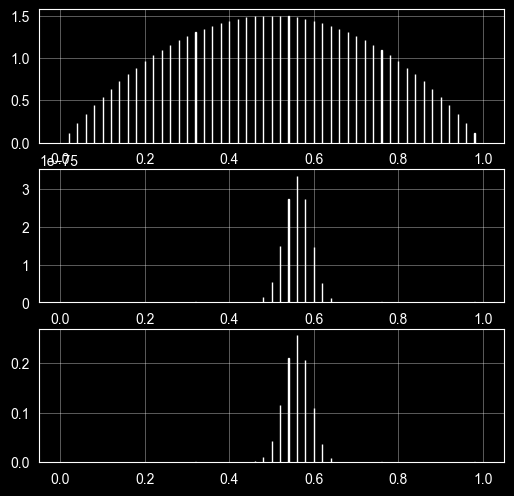

In [30]:
fig, axes = plt.subplots(3,1, figsize=(6,6))
for ax, pdf in zip(axes, [prior, likelihood, posterior]):
    ax.bar(probs, pdf, width=width)

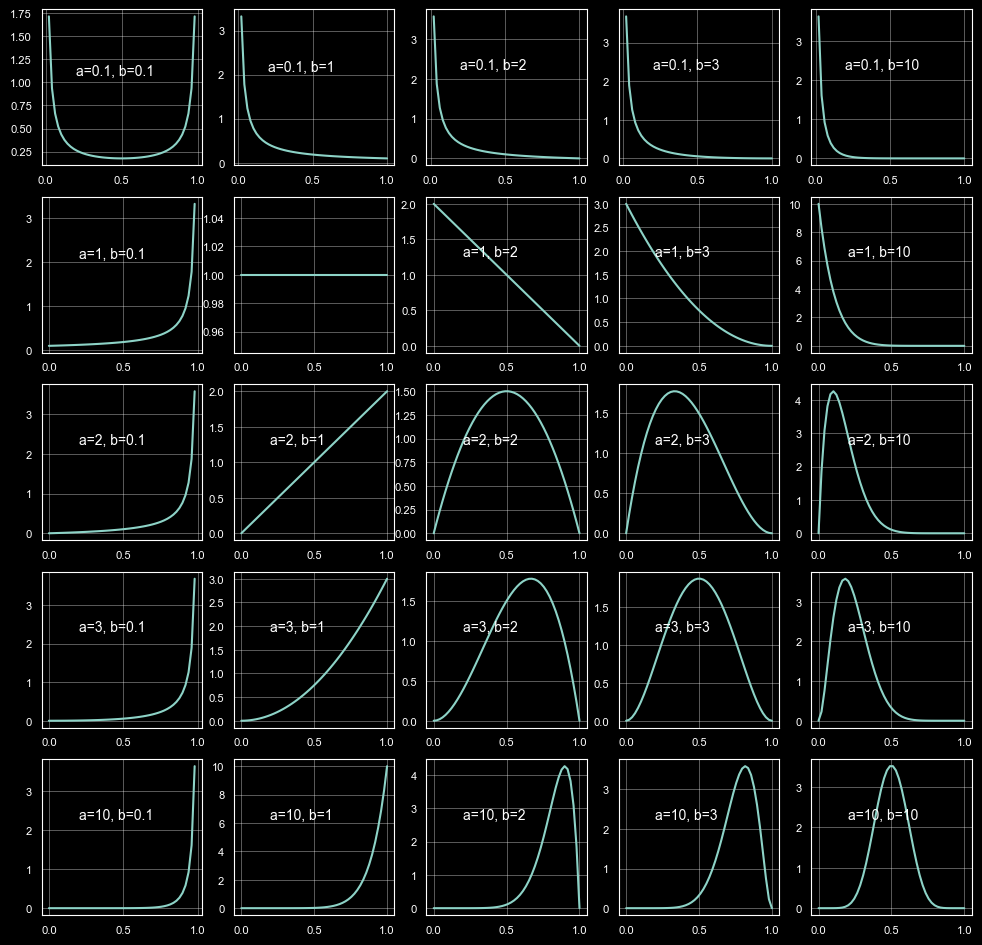

In [31]:
## Beta distribution
alphas = [0.1, 1, 2, 3, 10]
betas = [0.1, 1, 2, 3, 10]
p = np.linspace(0, 1, 50)
fig, axes = plt.subplots(5, 5, figsize=(12,12))
for i, a in enumerate(alphas):
    for j, b in enumerate(betas):
        ax = axes[i,j]
        ax.plot(p, stats.beta(a,b).pdf(p))
        ax.tick_params(labelsize=8)
        ax.text(0.2, ax.get_ylim()[1]*.6, f'a={a}, b={b}')

---

In [35]:
!jupyter nbconvert coin_flips_Bernoulli_Distribution.ipynb --to webpdf --HTMLExporter.theme=dark --allow-chromium-download

[NbConvertApp] Converting notebook coin_flips_Bernoulli_Distribution.ipynb to webpdf
[NbConvertApp] Writing 571251 bytes to coin_flips_Bernoulli_Distribution.pdf
